## Install FiftyOne

In [ ]:
!pip install fiftyone
!pip install tensorflow torch torchvision umap-learn
!pip install ipywidgets>=7.5

## Count the sample number of for each label

In [ ]:
dic = dict()
dir.sort()
print(dir[0:10])
cnt = 0
for p in dir:
  with open(path+'/'+p, 'r') as f:
    ss = f.readlines()
    print(cnt)
    cnt += 1
    for s in ss:
      first = s.split()[0]
      if first in dic:
        dic[first] += 1
      else:
        dic[first] = 1
print(dic)

In [ ]:
d = {'24': 525, '16': 99, '14': 2402, '6': 431, '23': 378, '2': 2153, '29': 237, '4': 963, '8': 33, '18': 255, '11': 144, '30': 94, '13': 175, '35': 98, '32': 618, '0': 378, '34': 266, '12': 63, '25': 98, '22': 497, '37': 741, '40': 68, '3': 142, '26': 121, '31': 48, '7': 161, '38': 486, '21': 28, '1': 96, '19': 145, '20': 37, '9': 42, '10': 148, '28': 70, '15': 38, '36': 212, '5': 114, '39': 53, '42': 89, '33': 66, '17': 26, '41': 2, '27': 207}
l = ['Apple', 'Bagel', 'Baked goods', 'Banana', 'Beer', 'Bell pepper', 'Bread', 'Broccoli', 'Burrito', 'Cabbage', 'Carrot', 'Cheese', 'Coconut', 'Egg (Food)', 'Fish', 'Garden Asparagus', 'Grapefruit', 'Guacamole', 'Juice', 'Lemon', 'Mango', 'Milk', 'Muffin', 'Mushroom', 'Orange', 'Pasta', 'Peach', 'Pear', 'Pineapple', 'Pizza', 'Pomegranate', 'Potato', 'Pumpkin', 'Radish', 'Seafood', 'Shellfish', 'Shrimp', 'Strawberry', 'Tomato', 'Turkey', 'Watermelon', 'Winter melon', 'Zucchini']

for k, item in sorted(d.items(), key=lambda x: x[1]):
  print(k, item, l[int(k)])

print(l[41])

In [ ]:
aa = ['Apple', 'Banana','Bell pepper', 'Broccoli', 'Cabbage', 'Carrot', 'Cheese', 'Coconut', 'Cucumber', 'Egg (Food)', 'Fish', 'Grape', 'Lemon', 'Mango', 'Milk', 'Mushroom', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Potato', 'Pumpkin', 'Seafood', 'Shrimp', 'Strawberry', 'Tomato', 'Watermelon', 'Winter melon']
print(len(aa))

28


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download Dataset from FiftyOne

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
dataset = foz.load_zoo_dataset(
    "open-images-v6", 
    split="train", 
    label_types=["detections", "classifications"], 
    classes = ['Apple', 'Banana', 'Bell pepper', 'Broccoli', 'Cabbage', 'Carrot', 'Cheese', 'Coconut', 'Cucumber', 'Egg (Food)', 'Fish', 'Grape', 'Lemon', 'Mango', 'Milk', 'Mushroom', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Potato', 'Pumpkin', 'Seafood', 'Shrimp', 'Strawberry', 'Tomato', 'Watermelon', 'Winter melon'],
    max_samples=3000,
    seed=51,
    shuffle=True,
    dataset_name="food_train",
)

 100% |████████████████| 3000/3000 [2.6m elapsed, 0s remaining, 20.3 images/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'train'
 100% |███████████████| 3000/3000 [37.7s elapsed, 0s remaining, 72.5 samples/s]      
Dataset 'food_train' created


## Check Dataset Size in Disk

In [ ]:
!du -h --max-depth=1 /root/fiftyone/open-images-v6/

4.3G	/root/fiftyone/open-images-v6/train
109M	/root/fiftyone/open-images-v6/validation
4.4G	/root/fiftyone/open-images-v6/


In [ ]:
dataset_val = foz.load_zoo_dataset(
    "open-images-v6", 
    split="validation", 
    label_types=["detections", "classifications"], 
    classes = ['Apple', 'Banana', 'Bell pepper', 'Broccoli', 'Cabbage', 'Carrot', 'Cheese', 'Coconut', 'Cucumber', 'Egg (Food)', 'Fish', 'Grape', 'Lemon', 'Mango', 'Milk', 'Mushroom', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Potato', 'Pumpkin', 'Seafood', 'Shrimp', 'Strawberry', 'Tomato', 'Watermelon', 'Winter melon'],
    max_samples=200,
    seed=51,
    shuffle=True,
    dataset_name="food_val",
)

 100% |██████████████████| 200/200 [10.4s elapsed, 0s remaining, 18.9 images/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |█████████████████| 200/200 [2.4s elapsed, 0s remaining, 82.0 samples/s]      
Dataset 'food_val' created


## Export Dataset

In [ ]:
export_dir = "/content/drive/MyDrive/fridge28"
label_field = "detections"  # for example

# The Dataset or DatasetView to export
dataset_or_view = dataset

# Export the dataset
dataset_or_view.export( 
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
    split="train"
)

Directory '/content/drive/MyDrive/fridge28' already exists; export will be merged with existing files
 100% |███████████████| 3000/3000 [1.7m elapsed, 0s remaining, 26.6 samples/s]      


In [ ]:
export_dir = "/content/drive/MyDrive/fridge28"
label_field = "detections"  # for example

# The Dataset or DatasetView to export
dataset_or_view = dataset_val

# Export the dataset
dataset_or_view.export( 
    export_dir=export_dir,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
    split="val"
)

Directory '/content/drive/MyDrive/fridge28' already exists; export will be merged with existing files
 100% |█████████████████| 200/200 [6.7s elapsed, 0s remaining, 29.8 samples/s]      


## Clone Yolov5 Code

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


## Copy yaml file

In [ ]:
!cp /content/drive/MyDrive/fridge28/fridge28.yaml /content/drive/MyDrive/yolo5/data

In [ ]:
!cp /content/drive/MyDrive/yolo5/yolov5s.pt /content/yolov5

In [ ]:
!cp -r /content/drive/MyDrive/yolo5/runs /content/yolov5

## Pip Requirements

In [ ]:
%cd /content/drive/MyDrive/yolo5
%pip install -qr requirements.txt

/content/drive/MyDrive/yolo5
     |████████████████████████████████| 596 kB 5.4 MB/s 


In [ ]:
!rm -r /content/drive/MyDrive/yolo5/runs/train/exp57

## Train the model

In [ ]:
!python train.py --img 640 --batch 50 --epochs 10 --data fridge43.yaml --weights /content/drive/MyDrive/yolo5/runs/train/exp56/weights/last.pt --cache

train: weights=/content/drive/MyDrive/yolo5/runs/train/exp55/weights/last.pt, cfg=, data=fridge43.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=50, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: ⚠️ WARNING: code is out of date by 142 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v5.0-378-g79af114 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0

In [ ]:
!python train.py --img 640 --batch 20 --epochs 100 --data fridge20.yaml --weights /content/drive/MyDrive/yolo5/runs/train/exp60/weights/last.pt --cache

train: weights=/content/drive/MyDrive/yolo5/runs/train/exp59/weights/last.pt, cfg=, data=fridge20.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 3), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.
From https://github.com/ultralytics/yolov5
   1172ac1..6b31cfd  master     -

In [ ]:
!python train.py --img 640 --batch 20 --epochs 1500 --data fridge20.yaml --weights runs/train/exp61/weights/last.pt --cache

train: weights=runs/train/exp61/weights/last.pt, cfg=, data=fridge20.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=1500, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: ⚠️ WARNING: code is out of date by 145 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v5.0-378-g79af114 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

## Detection

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolo5/runs/train/exp59/weights/best.pt --img 1100 --conf 0.2 --source /content/drive/MyDrive/yolo5/data/images

detect: weights=['/content/drive/MyDrive/yolo5/runs/train/exp59/weights/best.pt'], source=/content/drive/MyDrive/yolo5/data/images, imgsz=[1100, 1100], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-378-g79af114 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7145608 parameters, 0 gradients, 16.6 GFLOPs
image 1/23 /content/drive/MyDrive/yolo5/data/images/00001.jpg: 608x1120 1 Cabbage, 1 Carrot, 1 Cheese, 2 Cucumbers, 1 Egg (Food), 2 Tomatos, Done. (0.085s)
image 2/23 /content/drive/MyDrive/yolo5/data/images/00002.jpg: 640x1120 Done. (0.056s)
image 3/23 /content/drive/MyDrive/yolo5/data/images/001.jpg: 800x1120 3 Apples, 1 Egg (Food), 1 Milk, 1 Meat,

In [ ]:
!du -h  /content/drive/MyDrive/yolo5

In [ ]:
!cp -r /content/yolov5 /content/drive/MyDrive/yolo5

In [ ]:
!cp /content/drive/MyDrive/fridge20/fridge20.yaml /content/drive/MyDrive/yolo5/data

In [ ]:
!cp -r /content/drive/MyDrive/fridge20/labels/train /content/drive/MyDrive/fridge20/labels/val

In [ ]:
!cp /content/drive/MyDrive/fridge20/fridge20.yaml /content/drive/MyDrive/yolo5/data

In [ ]:
!mv /content/drive/MyDrive/yolo5/data/images/train/* /content/drive/MyDrive/yolo5/data/images

In [ ]:
!wget https://www.kaggle.com/vermaavi/food11/download

--2021-09-04 03:34:40--  https://www.kaggle.com/vermaavi/food11/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fvermaavi%2Ffood11%3Fresource%3Ddownload [following]
--2021-09-04 03:34:40--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fvermaavi%2Ffood11%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download.1’

download.1              [ <=>                ]   6.48K  --.-KB/s    in 0.002s  

2021-09-04 03:34:40 (3.40 MB/s) - ‘download.1’ saved [6639]



In [ ]:
from utils.plots import plot_results

plot_results('/content/results53.csv', '/content/')

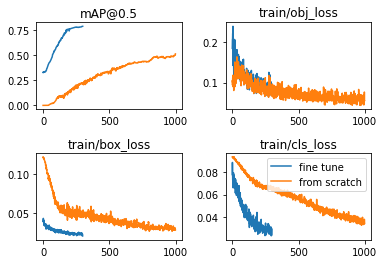

In [ ]:
import pandas as pd
r1 = pd.read_csv('/content/fine_tune_result.csv')
r2 = pd.read_csv('/content/results_scratch.csv')
# r1['metrics/mAP_0.5']
r1.columns.values.tolist()
col = r1['     metrics/mAP_0.5']
col2 = r2['     metrics/mAP_0.5']

c1 = r1['      train/obj_loss']
c2 = r2['      train/obj_loss']

d1 = r1['      train/box_loss']
d2 = r2['      train/box_loss']

e1 = r1['      train/cls_loss']
e2 = r2['      train/cls_loss']

# print(col.tolist())

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



plt.subplot(221)
plt.title("mAP@0.5")
plt.plot(col.tolist())
plt.plot(col2.tolist())

plt.subplot(222)
plt.title("train/obj_loss")
plt.plot(c1.tolist())
plt.plot(c2.tolist())

plt.subplot(223)
plt.title("train/box_loss")
plt.plot(d1.tolist())
plt.plot(d2.tolist())

plt.subplot(224)
plt.title("train/cls_loss")
plt.plot(e1.tolist())
plt.plot(e2.tolist())

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.legend(labels=['','from scratch'],loc='best')

plt.savefig('/content/res.png')
plt.show()
